In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d

In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [3]:
df.fillna("Unknown or not specified", inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Complaint ID          28156 non-null  int64 
 1   Product               28156 non-null  object
 2   Sub-product           28156 non-null  object
 3   Issue                 28156 non-null  object
 4   Sub-issue             28156 non-null  object
 5   State                 28156 non-null  object
 6   ZIP code              28156 non-null  int64 
 7   Date received         28156 non-null  object
 8   Date sent to company  28156 non-null  object
 9   Company               28156 non-null  object
 10  Company response      28156 non-null  object
 11  Timely response?      28156 non-null  object
 12  Consumer disputed?    28156 non-null  object
 13  dias de retraso       28156 non-null  object
 14  weekday               28156 non-null  object
dtypes: int64(2), object(13)
memory usage

In [5]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [6]:
df=df.drop(columns=[ "Date received",	"Date sent to company", "dias de retraso" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [7]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company,Company response,Timely response?,Consumer disputed?,weekday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,1288848,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,44241,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,1288304,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,77433,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,1289900,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,1289844,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
28149,1178177,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,48622,Experian,Closed with explanation,Yes,No,Thursday
28150,1178179,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,72160,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [8]:
df.drop(columns=["Complaint ID"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,44241,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,77433,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,48622,Experian,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,72160,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   ZIP code            6006 non-null   int64 
 6   Company             6006 non-null   object
 7   Company response    6006 non-null   object
 8   Timely response?    6006 non-null   object
 9   Consumer disputed?  6006 non-null   object
 10  weekday             6006 non-null   object
dtypes: int64(1), object(10)
memory usage: 563.1+ KB


In [10]:
X=df.drop(columns=["Consumer disputed?"])

In [11]:
y=df["Consumer disputed?"]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
 ])

# Categorical preprocessing with type conversion fix
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_str', FunctionTransformer(convert_to_str)),  # ← named function
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model=HistGradientBoostingClassifier(random_state=42)

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    #('pca', PCA(n_components=498)), 
    ('oversampler', SMOTE(random_state=42)),
    ('classifier', model)
])

# Train the pipeline

In [13]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [14]:
import optuna




param_distributions = {
    "classifier__learning_rate": optuna.distributions.FloatDistribution(0.01, 0.3, log=True),
    "classifier__max_iter": optuna.distributions.IntDistribution(100, 500),
    "classifier__max_leaf_nodes": optuna.distributions.IntDistribution(10, 50),
    "classifier__max_depth": optuna.distributions.IntDistribution(3, 10),
    "classifier__min_samples_leaf": optuna.distributions.IntDistribution(1, 20),
    "classifier__max_bins": optuna.distributions.IntDistribution(100, 255),


}

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [16]:
X_train

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company,Company response,Timely response?,weekday
25507,Debt collection,Unknown or not specified,Taking/threatening an illegal action,Attempted to/Collected exempt funds,ID,83201,Solidus Group LLC.,Closed with explanation,Yes,Thursday
26084,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Called after sent written cease of comm,IL,62568,Sunrise Credit Services Inc.,Closed with non-monetary relief,Yes,Wednesday
27791,Credit reporting,Unknown or not specified,Credit reporting company's investigation,No notice of investigation status/result,VA,20171,Equifax,Closed with explanation,Yes,Friday
22603,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",Unknown or not specified,CA,95304,Nationstar Mortgage,Closed with explanation,Yes,Thursday
13314,Credit reporting,Unknown or not specified,Incorrect information on credit report,Information is not mine,IL,60607,Equifax,Closed with explanation,Yes,Thursday
...,...,...,...,...,...,...,...,...,...,...
23427,Credit card,Unknown or not specified,APR or interest rate,Unknown or not specified,TX,78258,GE Capital Retail,Closed with monetary relief,Yes,Tuesday
26892,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,OH,43606,SunTrust Bank,Closed with non-monetary relief,Yes,Monday
26952,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",Unknown or not specified,CO,80517,Nationstar Mortgage,Closed with explanation,Yes,Monday
27236,Credit reporting,Unknown or not specified,Incorrect information on credit report,Information is not mine,CA,92801,TransUnion,Closed with non-monetary relief,Yes,Monday


In [17]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=30,  # Number of trials/studies
    timeout=None,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_29020\2954802289.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-07 13:02:00,064] A new study created in memory with name: no-name-ac32e03c-570e-48ae-809c-0012c18c52bf
[I 2025-08-07 13:02:28,841] Trial 6 finished with value: 0.5953106722043771 and parameters: {'classifier__learning_rate': 0.031093382439979975, 'classifier__max_iter': 156, 'classifier__max_leaf_nodes': 35, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 8, 'classifier__max_bins': 137}. Best is trial 6 with value: 0.5953106722043771.
[I 2025-08-07 13:02:50,230] Trial 2 finished with value: 0.5595656673441205 and parameters: {'classifier__learning_rate': 0.030107757116167727, 'classifier__max_iter': 368, 'classifier__max_leaf_nodes': 13, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 19, 'classifier__max_bins': 153}. Best is trial 6 wi

OptunaSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer()),
                                                                                           ('scaler',
                                                                                            StandardScaler())]),
                                                                           ['ZIP '
                                                                            'code']),
                                                                          ('cat',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('to_str',
                                                                                            FunctionTransformer(...
                                    'classifier__max_bins': IntDistribution(high=255, log=False, low=100, step=1),
                                    'classifier__max_depth': IntDistribution(high=10, log=False, low=3, step=1),
                                    'classifier__max_iter': IntDistribution(high=500, log=False, low=100, step=1),
                                    'classifier__max_leaf_nodes': IntDistribution(high=50, log=False, low=10, step=1),
                                    'classifier__min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1)},
               random_state=42, scoring='f1_macro', verbose=2)

In [33]:
model_pipeline.set_params(**optuna_search.best_params_)
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ZIP code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('to_str',
                                                                   FunctionTransformer(func=<function convert_to_str at 0x0000014587C753A0>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unkn...
                                                   'Company response',
                                                   'Timely response?',
                                                   'weekday'])])),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x00000145A7F96480>)),
                ('oversampler', SMOTE(random_state=42)),
                ('classifier',
                 HistGradientBoostingClassifier(learning_rate=0.031093382439979975,
                                                max_bins=137, max_depth=3,
                                                max_iter=156, max_leaf_nodes=35,
                                                min_samples_leaf=8,
                                                random_state=42))])

In [34]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,0.802062
1,0.589023
2,0.790558
3,0.340197
4,0.644713
...,...
4800,0.584453
4801,0.661181
4802,0.853628
4803,0.600413


In [35]:
y_pred = (y_probs[0] > 0.52).astype(int)
y_pred


0       1
1       1
2       1
3       0
4       1
       ..
4800    1
4801    1
4802    1
4803    1
4804    1
Name: 0, Length: 4805, dtype: int64

In [36]:
y_pred.value_counts()

0
1    3730
0    1075
Name: count, dtype: int64

In [37]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.7032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.33      1045
           1       0.81      0.81      0.81      3760

    accuracy                           0.70      4805
   macro avg       0.57      0.57      0.57      4805
weighted avg       0.71      0.70      0.70      4805

Confusion Matrix:


<Axes: >

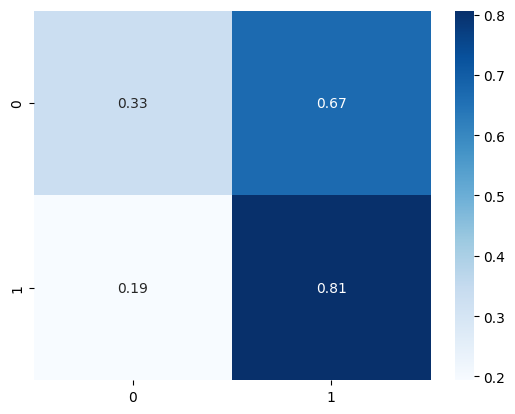

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


In [39]:
import numpy as np
thresholds = np.arange(.3, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.3
Mejor F1 obtenido: 0.8776154295733489


In [40]:
import numpy as np
thresholds = np.arange(.3, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para accuracy: {best_threshold}")
print(f"Mejor accuracy obtenido: {best_f1}")

Mejor umbral (threshold) para accuracy: 0.3
Mejor accuracy obtenido: 0.78210197710718


In [41]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=5)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.7402247579529738
0.028373482886740516


In [27]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randon_onehot.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randon_onehot.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [42]:
import dill
with open("modelo_pipe_dispute_gradient_company_onehot.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [29]:
trained_preprocessor.transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 59185 stored elements and shape (6006, 491)>

In [30]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

(6006, 1)
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...


In [31]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 491)
        0    1    2    3    4    5    6    7    8    9    ...  481  482  483  \
0 -1.557324    0    0    0    0    0    0  1.0    0    0  ...    0    0  1.0   
1 -0.168079    0  1.0    0    0    0    0    0    0    0  ...    0    0  1.0   
2   0.92685    0    0    0    0  1.0    0    0    0    0  ...    0    0  1.0   
3   1.15684    0    0    0    0  1.0    0    0    0    0  ...  1.0    0  1.0   
4  0.365333    0    0    0    0  1.0    0    0    0    0  ...    0    0  1.0   

   484  485  486  487  488  489  490  
0    0    0    0    0  1.0    0    0  
1    0    0    0    0    0    0  1.0  
2    0    0    0    0    0    0  1.0  
3    0    0    0    0    0    0  1.0  
4    0    0    0    0    0    0  1.0  

[5 rows x 491 columns]


In [32]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
0,-1.557324,0,0,0,0,0,0,1.0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
1,-0.168079,0,1.0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
2,0.92685,0,0,0,0,1.0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
3,1.15684,0,0,0,0,1.0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,0,0,1.0
4,0.365333,0,0,0,0,1.0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,-0.02356,0,0,0,1.0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6002,0.752906,0,0,1.0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6003,0.853221,0,0,0,0,1.0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
6004,0.1903,0,0,0,0,0,0,1.0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
